# FACTORS AFFECTING THE WINNING ABILITY OF TEAMS PARTICIPATING IN THE WORLD CUP
In this project, we're going to analyze a dataset about 21 Fifa World Cups.

Our goal is to find out which element affects to winning rate and which does not.

## Fifa world cup Dataset
This dataset is made by Hải Nam with big helps from Tuấn Vũ and Thanh Trúc of Group 6.

In [1]:
# import libs
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
# add datas
excel_file = pd.ExcelFile('Fifa_world_cup_raw3.xlsx')
ff_matches = pd.read_excel(excel_file, sheet_name='All Matches')
ff_details = pd.read_excel(excel_file, sheet_name='Match Details')
regions_list = pd.read_excel('regions_list.xlsx', sheet_name='region list')

In [3]:
# view data
ff_matches.head()

,Unnamed: 0,Year,Stage,Date,Time,Stadium,Location,Home Team,HT Goals,AT Goals,Away Team,Match Attendance,MatchID,Refer
0,0,1930,Group 1,13 July 1930,15:00,Estadio Pocitos,Montevideo,France,4,1,Mexico,"4,444",1096,https://www.fifa.com/worldcup/archive/uruguay1...
1,0,1930,Group 1,15 July 1930,16:00,Estadio Parque Central,Montevideo,Argentina,1,0,France,"23,409",1085,https://www.fifa.com/worldcup/archive/uruguay1...
2,0,1930,Group 1,16 July 1930,14:45,Estadio Parque Central,Montevideo,Chile,3,0,Mexico,"9,249",1095,https://www.fifa.com/worldcup/archive/uruguay1...
3,0,1930,Group 1,19 July 1930,12:50,Estadio Centenario,Montevideo,Chile,1,0,France,"2,000",1094,https://www.fifa.com/worldcup/archive/uruguay1...
4,0,1930,Group 1,19 July 1930,15:00,Estadio Centenario,Montevideo,Argentina,6,3,Mexico,"42,100",1086,https://www.fifa.com/worldcup/archive/uruguay1...


In [4]:
ff_matches.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 900 entries, 0 to 899
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Unnamed: 0        900 non-null    int64 
 1   Year              900 non-null    int64 
 2   Stage             900 non-null    object
 3   Date              900 non-null    object
 4   Time              900 non-null    object
 5   Stadium           900 non-null    object
 6   Location          900 non-null    object
 7   Home Team         900 non-null    object
 8   HT Goals          900 non-null    int64 
 9   AT Goals          900 non-null    object
 10  Away Team         900 non-null    object
 11  Match Attendance  900 non-null    object
 12  MatchID           900 non-null    int64 
 13  Refer             899 non-null    object
dtypes: int64(4), object(10)
memory usage: 98.6+ KB


In [5]:
ff_matches.isnull().sum()

Unnamed: 0          0
Year                0
Stage               0
Date                0
Time                0
Stadium             0
Location            0
Home Team           0
HT Goals            0
AT Goals            0
Away Team           0
Match Attendance    0
MatchID             0
Refer               1
dtype: int64

In [6]:
ff_details.head()

,Unnamed: 0,MatchID,Refer,HT Role,HT Captain,HT Shirt Number,HT Fullname,HT Discipline,HT In_Out,HT Goal,AT Goal,AT Role,AT Captain,AT Shirt Number,AT Fullname,AT Discipline,AT In_Out,Home Team,Away Team
0,0.0,1096.0,https://www.fifa.com/worldcup/archive/uruguay1...,GK,NaN,None,Alex Thépot,None,None,NaN,NaN,GK,NaN,None,Oscar Bonfiglio,None,None,France,Mexico
1,1.0,1096.0,https://www.fifa.com/worldcup/archive/uruguay1...,FB,NaN,None,Étienne Mattler,None,None,NaN,NaN,FB,1.0,None,Rafael Garza Gutiérrez,None,None,France,Mexico
2,2.0,1096.0,https://www.fifa.com/worldcup/archive/uruguay1...,FB,NaN,None,Marcel Capelle,None,None,NaN,NaN,FB,NaN,None,Manuel Rosas,None,None,France,Mexico
3,3.0,1096.0,https://www.fifa.com/worldcup/archive/uruguay1...,HB,NaN,None,Augustin Chantrel,None,None,NaN,NaN,HB,NaN,None,None,None,None,France,Mexico
4,4.0,1096.0,https://www.fifa.com/worldcup/archive/uruguay1...,HB,1.0,None,Alexandre Villaplane,None,None,NaN,NaN,HB,NaN,None,Alfredo Sánchez,None,None,France,Mexico


In [7]:
ff_details.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13130 entries, 0 to 13129
Data columns (total 19 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       13024 non-null  float64
 1   MatchID          13024 non-null  float64
 2   Refer            12997 non-null  object 
 3   HT Role          12877 non-null  object 
 4   HT Captain       796 non-null    float64
 5   HT Shirt Number  12877 non-null  object 
 6   HT Fullname      12883 non-null  object 
 7   HT Discipline    12877 non-null  object 
 8   HT In_Out        12877 non-null  object 
 9   HT Goal          1019 non-null   object 
 10  AT Goal          777 non-null    object 
 11  AT Role          12785 non-null  object 
 12  AT Captain       797 non-null    float64
 13  AT Shirt Number  12785 non-null  object 
 14  AT Fullname      12796 non-null  object 
 15  AT Discipline    12785 non-null  object 
 16  AT In_Out        12785 non-null  object 
 17  Home Team   

In [8]:
ff_details.isnull().sum()

Unnamed: 0           106
MatchID              106
Refer                133
HT Role              253
HT Captain         12334
HT Shirt Number      253
HT Fullname          247
HT Discipline        253
HT In_Out            253
HT Goal            12111
AT Goal            12353
AT Role              345
AT Captain         12333
AT Shirt Number      345
AT Fullname          334
AT Discipline        345
AT In_Out            345
Home Team            103
Away Team            103
dtype: int64

In [9]:
regions_list.head()

,Region,Country
0,Europe,Czechoslovakia
1,Africa,Algeria
2,Europe,Yugoslavia
3,Europe,Germany
4,Asia & Pacific,United Arab Emirates


In [10]:
regions_list.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 86 entries, 0 to 85
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Region   86 non-null     object
 1   Country  86 non-null     object
dtypes: object(2)
memory usage: 1.5+ KB


### Fifa world cup Dataset have 2 sheets: All Matches and Match Details
#### The All Matches worksheet 
has 899 rows and 14 columns with 1 null in Refer columns. The worksheet displays 899 matches of 21 Fifa World Cups refer to columns Year. Each row of this worksheet contains information for a match such as Year, Stage, Date, Time, Stadium, Location, Home Team, HT Goals, AT Goals, Away Team, Match Attendance, MatchID, Refer. The columns 'Unnamed: 0' displays the same with index
   
#### The Match Details worksheet
has 13130 rows and 19 columns with 52655 null values in 19 columns. The worksheet displays the details of each match refer to matchID such as Refer, HT Role, HT Captain, HT Shirt Number, HT Fullname, HT Discipline, HT In_out, HT Goal, AT Goal, AT Role, AT Captain, AT Shirt Number, AT Fullname, AT Discipline, AT In_out, Home Team, Away Team. The columns 'Unnamed: 0' displays the same with index

### Regions Dataset has 1 sheets: region list
has 86 rows and 2 columns without null value. The worksheet displays the country and its region.

### Clean up, change data type and create some needed columns
There are so many 'None', 'NaN', 'missing' and appended '[1]' values in the columns, we will replace them with '' and correct datatype for some columns after cleanned up

In [11]:
# clean up leading and ending spaces
ff_matches = ff_matches.replace(to_replace='^\\s+', value='', regex=True)
ff_matches = ff_matches.replace(to_replace='\\s+$', value='', regex=True)
ff_details = ff_details.replace(to_replace='^\\s+', value='', regex=True)
ff_details = ff_details.replace(to_replace='\\s+$', value='', regex=True)
ff_details['HT Discipline'] = ff_details['HT Discipline'].replace('None', '0')
ff_details['HT Discipline'] = ff_details['HT Discipline'].replace('missing', '0')
ff_details['HT Discipline'] = ff_details['HT Discipline'].fillna('0')
ff_details['HT Discipline'] = ff_details['HT Discipline'].replace(r'\[.\]', '', regex=True)
ff_details['AT Discipline'] = ff_details['AT Discipline'].replace('None', '0')
ff_details['AT Discipline'] = ff_details['AT Discipline'].replace('missing', '0')
ff_details['AT Discipline'] = ff_details['HT Discipline'].replace(r'\[.\]', '0')
ff_details['AT Discipline'] = ff_details['AT Discipline'].fillna('0')


# create column Winstats, New HT Goals, New AT Goals
ff_matches['Winstats'] = 0
ff_matches['New HT Goals'] = ff_matches['HT Goals'].copy()
ff_matches['New AT Goals'] = ff_matches['AT Goals'].copy()

# clear non-numeric chatacters from New HT Goals, New AT Goals
ff_matches[['New AT Goals','New HT Goals']] = ff_matches[['New AT Goals','New HT Goals']].replace(to_replace='\D+', value='', regex=True)

# change dtype of the 2 columns to 'int64'
ff_matches[['New HT Goals', 'New AT Goals']] = ff_matches[['New HT Goals', 'New AT Goals']].astype('int64')

# convert Date to datetime type
ff_matches['Date'] = pd.to_datetime(ff_matches['Date'])

# set Winstats = 1 if values in New HT Goals larger than New AT Goals
mask_1 = ff_matches['New HT Goals']-ff_matches['New AT Goals']> 0
ff_matches.loc[mask_1, 'Winstats'] = 1

# set Winstats = -1 if values in New HT Goals smaller than New AT Goals
mask_neg1 = ff_matches['New HT Goals']-ff_matches['New AT Goals']< 0
ff_matches.loc[mask_neg1, 'Winstats'] = -1

### We will find out how many a team win, draw and lose
We retrieve a countries_list from reading Home Team and Away Team, using that list to count how many a team win, draw and lose
With above data, we calculate the rating of each element (win, draw, lose, avg goals)

In [12]:
# retrieve set of country name
countries_list = list(set(pd.concat([ff_matches['Home Team'], ff_matches['Away Team']], axis=0)))

# Generate team_info_dict from countries_list and ff_matches
team_info_dict = {}
for country in countries_list:    
    for i, name in enumerate(ff_matches['Home Team']):
        if country == name:
            if country not in team_info_dict:
                team_info_dict[country] = {'win':0, 'draw': 0, 'lose': 0, 'goals': 0, 'matches': 0}
            if ff_matches.loc[i, 'Winstats'] == 1:
                team_info_dict[country]['win'] += 1
            elif ff_matches.loc[i, 'Winstats'] == -1:
                team_info_dict[country]['lose'] += 1
            elif ff_matches.loc[i, 'Winstats'] == 0:
                team_info_dict[country]['draw'] += 1
            team_info_dict[country]['goals'] += ff_matches.loc[i, 'New HT Goals']
            team_info_dict[country]['matches'] += 1
                
    for i, name in enumerate(ff_matches['Away Team']):
        if country == name:
            if country not in team_info_dict:
                team_info_dict[country] = {'win':0, 'draw': 0, 'lose': 0, 'goals': 0, 'matches': 0}
            if ff_matches.loc[i, 'Winstats'] == -1:
                team_info_dict[country]['win'] += 1
            elif ff_matches.loc[i, 'Winstats'] == 1:
                team_info_dict[country]['lose'] += 1
            elif ff_matches.loc[i, 'Winstats'] == 0:
                team_info_dict[country]['draw'] += 1
            team_info_dict[country]['goals'] += ff_matches.loc[i, 'New AT Goals']
            team_info_dict[country]['matches'] += 1
         
# create df_team_info
df_team_info = pd.DataFrame(team_info_dict).T

# create df_winrate
def percent(element):
    return round(element/df_team_info['matches'],3)

df_winrate = df_team_info.copy()
df_winrate[['win','draw','lose']] = df_winrate[['win','draw','lose']].apply(percent)
df_winrate[['goals']] = df_winrate[['goals']].apply(percent)

In [13]:
print(df_winrate)

                         win   draw   lose  goals  matches
Croatia                0.478  0.174  0.348  1.522       23
Costa Rica             0.278  0.278  0.444  1.056       18
Uruguay                0.429  0.214  0.357  1.554       56
Senegal                0.375  0.375  0.250  1.375        8
China                  0.000  0.000  1.000  0.000        3
...                      ...    ...    ...    ...      ...
France                 0.515  0.197  0.288  1.818       66
Turkey                 0.500  0.100  0.400  2.000       10
Serbia and Montenegro  0.000  0.000  1.000  0.667        3
Cuba                   0.333  0.333  0.333  1.667        3
Brazil                 0.670  0.165  0.165  2.101      109

[85 rows x 5 columns]


### Top 10 Country of Winning rate

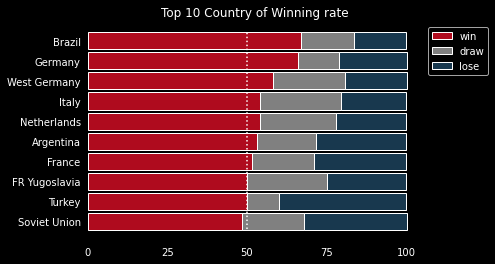

In [14]:
# create top 10 countries by winrate
top_10_winrate_country = df_winrate[['win','draw','lose']].sort_values(by='win', ascending=False).head(10)

# create 100% stacked bar for top 10 winrate of country
# prepair data in percentage
df=top_10_winrate_country.sort_values(by='win', ascending=True).copy()
r = range(len(df))
winBars = list(df['win']*100)
drawBars = list(df['draw']*100)
loseBars = list(df['lose']*100)

# plot info
barHeight = 0.85
names = tuple(df.index)
fig, ax = plt.subplots()
# create win Bars
ax.barh(r, winBars, color='#af0b1e', edgecolor='white', height=barHeight, label="win")
# create draw Bars
ax.barh(r, drawBars, left=winBars, color='grey', edgecolor='white', height=barHeight, label="draw")
# create lose Bars
ax.barh(r, loseBars, left=[i+j for i,j in zip(winBars, drawBars)], color='#18384e', edgecolor='white', height=barHeight, label="lose")
 
# custom x axis
plt.yticks(r, names) # set the name of each Bar
ax.set_xticks([0,25,50,75,100]) # overwrite the xticks at the bottom
plt.tick_params(bottom=0, left=0) # disable the tick from bottom and left side

for pos in ['top', 'left', 'right', 'bottom']:
    ax.spines[pos].set_visible(0)
 
# add a legend
ax.legend(loc='upper left', bbox_to_anchor=(1,1), ncol=1)
 
# add a line
ax.axvline(x=50, ls=':', color = 'white', ymin=0.05, ymax=0.95)
ax.set_title(label='Top 10 Country of Winning rate')

# show graph
plt.show()

### The Winning Rate by Region

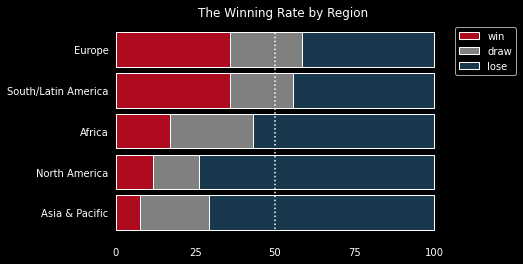

In [15]:
# apply map_region to Region column in df_winrate
def map_region(name):
    for i, country in enumerate(regions_list['Country']):
        if name == country:
            return regions_list.loc[i, 'Region']
        else:
            pass
    return 'not listed'
df_winrate = df_winrate.reset_index()
df_winrate = df_winrate.rename(columns={'index':'Country'})
df_winrate['Region'] = df_winrate['Country'].apply(map_region)
df_winrate_of_region = pd.pivot_table(data=df_winrate,index='Region', aggfunc='mean').sort_values(by='win', ascending=0)[['win','draw','lose']]

# create 100% stacked bar for winrate of region
# prepair data in percentage
df = df_winrate_of_region.sort_values(by='win', ascending=True).copy()
r = range(len(df))
winBars = list(df['win']*100)
drawBars = list(df['draw']*100)
loseBars = list(df['lose']*100)

# plot info
barHeight = 0.85
names = tuple(df.index)
fig, ax = plt.subplots()
# create win Bars
ax.barh(r, winBars, color='#af0b1e', edgecolor='white', height=barHeight, label="win")
# create draw Bars
ax.barh(r, drawBars, left=winBars, color='grey', edgecolor='white', height=barHeight, label="draw")
# create lose Bars
ax.barh(r, loseBars, left=[i+j for i,j in zip(winBars, drawBars)], color='#18384e', edgecolor='white', height=barHeight, label="lose")
 
# custom x axis
plt.yticks(r, names) # set the name of each Bar
ax.set_xticks([0,25,50,75,100]) # overwrite the xticks at the bottom
plt.tick_params(bottom=0, left=0) # disable the tick from bottom and left side

for pos in ['top', 'left', 'right', 'bottom']:
    ax.spines[pos].set_visible(0)

# add legend
ax.legend(loc='upper left', bbox_to_anchor=(1,1), ncol=1)
 
# add a line
ax.axvline(x=50, ls=':', color = 'white', ymin=0.05, ymax=0.95)
ax.set_title(label='The Winning Rate by Region')

# show graph
plt.show()

### We will find out the name of participants of semi-finals and finals
By getting the 2 last matches of each final stage, we will found out the 4 teams that participates to semi-finals and finals

In [16]:
year_list = list(set(ff_matches['Year']))
df_final_stage = pd.DataFrame(None)
for year in year_list:
    df_final = ff_matches[((ff_matches['Stage'] == 'final round')| (ff_matches['Stage'] == 'final tournament')|(ff_matches['Stage'] == 'knockout stage')) & (ff_matches['Year'] == year)].iloc[[-2, -1], :]
    df_final_stage = pd.concat([df_final_stage, df_final],axis=0)

attend_final_country = list(set(pd.concat([df_final_stage['Home Team'], df_final_stage['Away Team']], axis=0)))

attend_counter = {}
for country in attend_final_country:    
    for name in df_final_stage['Home Team']:
        if country == name:
            try: 
                if attend_counter[country] > 0:
                    attend_counter[country] += 1
            except KeyError:
                attend_counter[country] = 1
            
    for name in df_final_stage['Away Team']:
        if country == name:
            try: 
                if attend_counter[country] > 0:
                    attend_counter[country] += 1
            except KeyError:
                attend_counter[country] = 1                

df_final_stage_count = pd.DataFrame(data=attend_counter, index=['Attend']).T
df_final_stage_count = df_final_stage_count.reset_index()

def mapping_(element):
    for i, item in enumerate(df_winrate['Country']):
        if element == item:
            return df_winrate.loc[i, 'win']
        else:
            pass
    return 'not found'

df_final_stage_count['win'] = df_final_stage_count['index'].apply(mapping_)
df_final_stage_count = df_final_stage_count.sort_values(by='win', ascending=0)

### Participants of Semi-finals and Finals

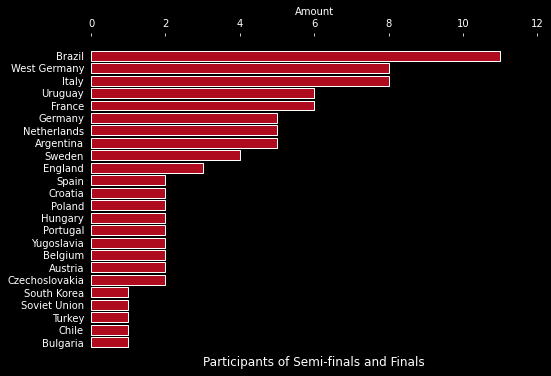

In [17]:
# Create BarH chart of Participants of Semi-finals and Finals
df = df_final_stage_count.sort_values(by='Attend', ascending=True).copy()
fig, ax = plt.subplots(figsize=(8,6))
r = range(len(df))
barHeight = 0.8
names = df['index']
ax.barh(r, df['Attend'], color='#af0b1e', edgecolor='white', height=barHeight, label='attend')
plt.yticks(r, names)
plt.tick_params(bottom=0, left=0)

for pos in ['top', 'left', 'right', 'bottom']:
    ax.spines[pos].set_visible(0)

# set xticks 
ax.xaxis.tick_top()
ax.xaxis.set_label_position('top')
ax.set_xticks([0,2,4,6,8,10,12])
ax.set_xlabel('Amount')

ax.set_title(label='Participants of Semi-finals and Finals', y = -0.03)
plt.show()

### Top 10 Countries by average goal

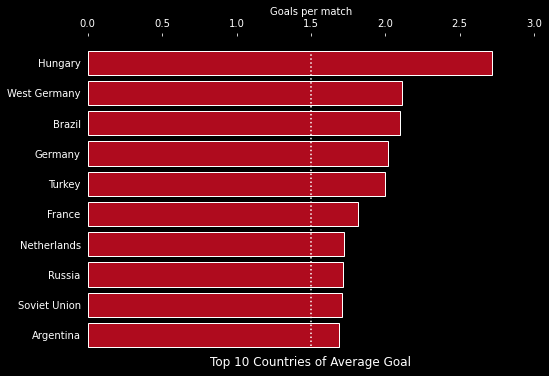

In [18]:
# create df_avg_goal and top 10 avg goal
df_avg_goal = df_winrate[['Country', 'win', 'goals']].copy().sort_values(by='goals', ascending=0)
top_10_country_by_avg_goal = df_avg_goal.head(10)

# Create BarH chart of Top 10 Countries of Average Goal
df = top_10_country_by_avg_goal.sort_values(by='goals', ascending=True).copy()
fig, ax = plt.subplots(figsize=(8,6))
r = range(len(df))
barHeight = 0.8
names = df['Country']
ax.barh(r, df['goals'], color='#af0b1e', edgecolor='white', height=barHeight, label='attend')
plt.yticks(r, names)
plt.tick_params(bottom=0, left=0)

for pos in ['top', 'left', 'right', 'bottom']:
    ax.spines[pos].set_visible(0)

# set xticks 
ax.xaxis.tick_top()
ax.xaxis.set_label_position('top')
ax.set_xlim(0,3)
ax.set_xlabel('Goals per match')

ax.axvline(x=1.5, ls=':', color = 'white', ymin=0.05, ymax=0.95)
ax.set_title(label='Top 10 Countries of Average Goal', y = -0.03)
plt.show()

### We will collect Discipline cards for each Team
By counting the ' from each cell, we will retrieve the number of cards that Home Team or Away Team made from a match. After that, we merge them up and sum for the cards of each Team.

In [19]:
ff_details.loc[ff_details['HT Discipline'].str.count(r"'") == 3.0, 'HT Discipline'] = '3'
ff_details.loc[ff_details['HT Discipline'].str.count(r"'") == 2.0, 'HT Discipline'] = '2'
ff_details.loc[ff_details['HT Discipline'].str.count(r"'") == 1.0, 'HT Discipline'] = '1'
ff_details.loc[ff_details['AT Discipline'].str.count(r"'") == 3.0, 'AT Discipline'] = '3'
ff_details.loc[ff_details['AT Discipline'].str.count(r"'") == 2.0, 'AT Discipline'] = '2'
ff_details.loc[ff_details['AT Discipline'].str.count(r"'") == 1.0, 'AT Discipline'] = '1'
ff_details[['AT Discipline', 'HT Discipline']] = ff_details[['AT Discipline', 'HT Discipline']].astype('int64')

In [20]:
df_HT_cards = ff_details.pivot_table(index='Home Team', aggfunc='sum')[['HT Discipline']]
df_AT_cards = ff_details.pivot_table(index='Away Team', aggfunc='sum')[['AT Discipline']]
df_cards = pd.merge(left = df_HT_cards, right= df_AT_cards, left_index=True, right_index=True, how='left').fillna(0)
df_cards = df_cards.sum(axis=1).rename('Cards')
df_team_info = pd.merge(left=df_team_info, right=df_cards, left_index=True, right_on='Home Team', how='left').fillna(0).rename(columns={'Home Team': 'Country'})
df_team_info = df_team_info.reset_index().drop(columns='index')
top_10_country_by_cards = df_team_info.sort_values(by='Cards', ascending=0)[['Country', 'Cards']].head(10)

### Top 10 Countries with Discipline cards

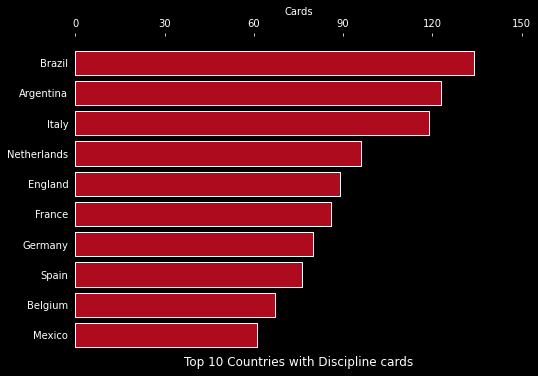

In [21]:
# create BarH for top 10 countries by cards
df = top_10_country_by_cards.sort_values(by='Cards', ascending=True).copy()
fig, ax = plt.subplots(figsize=(8,6))
r = range(len(df))
barHeight = 0.8
names = df['Country']
ax.barh(r, df['Cards'], color='#af0b1e', edgecolor='white', height=barHeight, label='Cards')
plt.yticks(r, names)
plt.tick_params(bottom=0, left=0)

for pos in ['top', 'left', 'right', 'bottom']:
    ax.spines[pos].set_visible(0)

# set xticks 
ax.xaxis.tick_top()
ax.xaxis.set_label_position('top')
ax.set_xticks([0,30,60,90,120,150])
ax.set_xlabel('Cards')

ax.set_title(label='Top 10 Countries with Discipline cards', y = -0.03)
plt.show()

## Now we collect all the above data into a DataFrame team info

In [22]:
df_team_info_percent = df_team_info.copy()
df_team_info_percent[['win', 'draw', 'lose', 'goals', 'Cards']] = df_team_info[['win', 'draw', 'lose', 'goals', 'Cards']].apply(percent)

In [23]:
df_team_info_percent_corr = df_team_info_percent.corr()

## FACTORS AFFECTING THE WINNING ABILITY OF TEAMS PARTICIPATING IN THE WORLD CUP

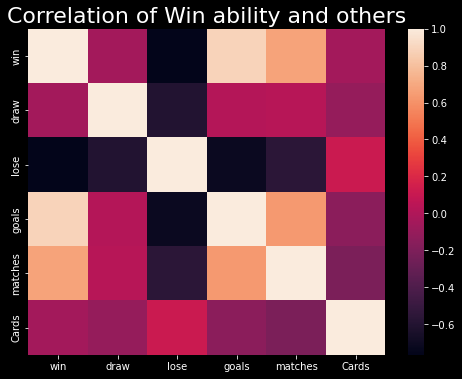

              win      draw      lose     goals   matches     Cards
win      1.000000 -0.050588 -0.766240  0.883472  0.675552 -0.050354
draw    -0.050588  1.000000 -0.602966  0.014840  0.032632 -0.109901
lose    -0.766240 -0.602966  1.000000 -0.715087 -0.560516  0.110756
goals    0.883472  0.014840 -0.715087  1.000000  0.631838 -0.148467
matches  0.675552  0.032632 -0.560516  0.631838  1.000000 -0.209285
Cards   -0.050354 -0.109901  0.110756 -0.148467 -0.209285  1.000000


In [24]:
fig = plt.figure(figsize=(8,6))
sns.heatmap(df_team_info_percent_corr)
plt.title('Correlation of Win ability and others', fontsize = 22)
plt.show()
print(df_team_info_percent_corr)

### Conclusion:
#### FACTORS AFFECTING THE WINNING ABILITY:
 - draw: weak or no correlation
 - lose: negative correlation
 - goals: strong positive correlation
 - matches: positive correlation
 - cards: weak or no correlation